# ANALYST: QUINTO POGI 

In [23]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import folium
from folium.plugins import HeatMap



In [ ]:
df.columns

In [2]:
df = pd.read_csv ('Dataset//dengue.csv')


# 1. What is the overall correlation among all numerical variables?

In [3]:
df.corr(numeric_only=True)


,Year,Dengue_Cases,Dengue_Deaths
Year,1.000000,0.021167,-0.120163
Dengue_Cases,0.021167,1.000000,0.038322
Dengue_Deaths,-0.120163,0.038322,1.000000


# Insight shows that dengue cases and deaths are  correlated, meaning that regions with more cases have more fatalities.

# 2. Which region has the highest average dengue cases?

In [7]:
df.groupby('Region')['Dengue_Cases'].mean().sort_values(ascending=False)


Region
Region IV-A    2717.150000
Region III     2184.400000
Region VI      1958.716667
NCR            1932.766667
Region VII     1844.716667
Region X       1373.950000
Region XII      996.700000
Region I        984.433333
Region VIII     866.383333
Region IX       796.350000
Region II       752.350000
Region XIII     588.216667
Region XI       542.033333
Region IV-B     514.150000
CAR             509.700000
Region V        369.450000
BARMM           192.283333
Name: Dengue_Cases, dtype: float64

# insights show that The region at the top have experiences higher dengue cases

# 3. Which year recorded the highest number of dengue cases?


In [8]:
df.groupby('Year')['Dengue_Cases'].sum().sort_values(ascending=False)


Year
2019    441902
2018    250783
2016    209544
2017    154155
2020     91041
Name: Dengue_Cases, dtype: int64

# insights shows that its 2019 

# 4. Which year recorded the highest dengue deaths?

In [9]:
df.groupby('Year')['Dengue_Deaths'].sum().sort_values(ascending=False)


Year
2016    8127
2017    4563
2019    1733
2018    1226
2020    1195
Name: Dengue_Deaths, dtype: int64

# insights shows that its 2016

# 5. How do dengue cases trend over time?

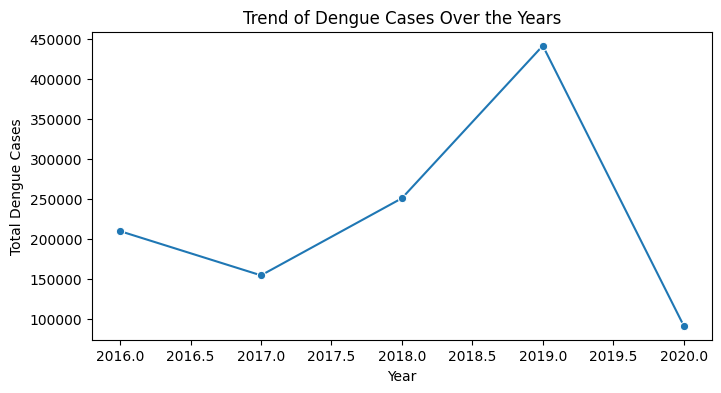

In [12]:
yearly_cases = df.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(8,4))
sns.lineplot(x=yearly_cases.index, y=yearly_cases.values, marker='o')
plt.title('Trend of Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.show()



# Insight shows that The line shows clear fluctuations, highlighting years with notable spikes in dengue cases.

# 6. Which months have the highest dengue cases?

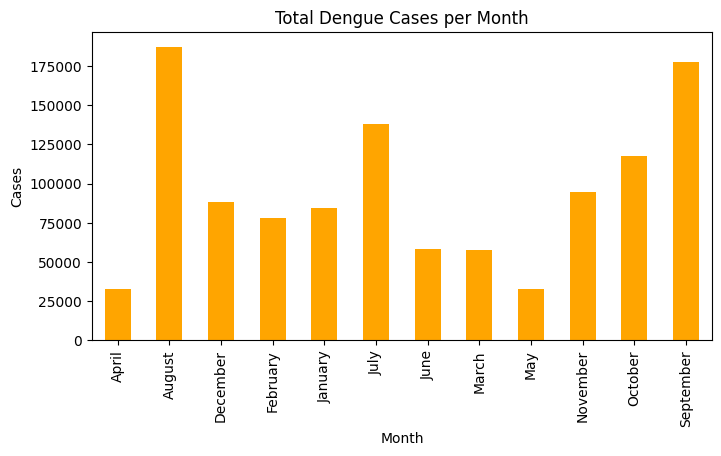

In [13]:
monthly_cases = df.groupby('Month')['Dengue_Cases'].sum()
monthly_cases.plot(kind='bar', color='orange', figsize=(8,4))
plt.title('Total Dengue Cases per Month')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.show()


# insights shows its usually rainy season

# 7. Which months have the highest dengue deaths?


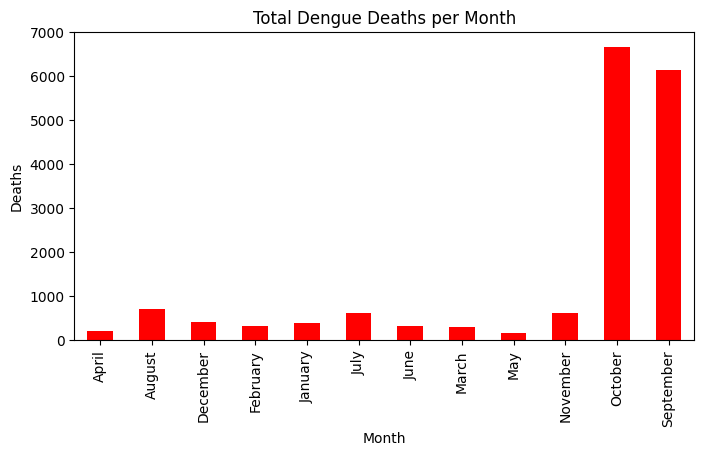

In [14]:
monthly_deaths = df.groupby('Month')['Dengue_Deaths'].sum()
monthly_deaths.plot(kind='bar', color='red', figsize=(8,4))
plt.title('Total Dengue Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.show()


# insihgts its october and september which august isn't a part of surprisingly

# 8. Which regions have both high dengue cases and high deaths?

In [15]:
high = df[(df['Dengue_Cases'] > df['Dengue_Cases'].mean()) &
          (df['Dengue_Deaths'] > df['Dengue_Deaths'].mean())]
high[['Region', 'Dengue_Cases', 'Dengue_Deaths']]


,Region,Dengue_Cases,Dengue_Deaths
95,Region II,2497,17
96,Region II,1797,18
139,Region III,4764,18
150,Region III,4576,19
151,Region III,5581,18
...,...,...,...
873,NCR,4472,32
874,NCR,3335,20
883,NCR,5481,36
884,NCR,11033,58


# insights shows that These regions face the most severe impact of dengue outbreaks

# 9. How does dengue vary across regions and years?

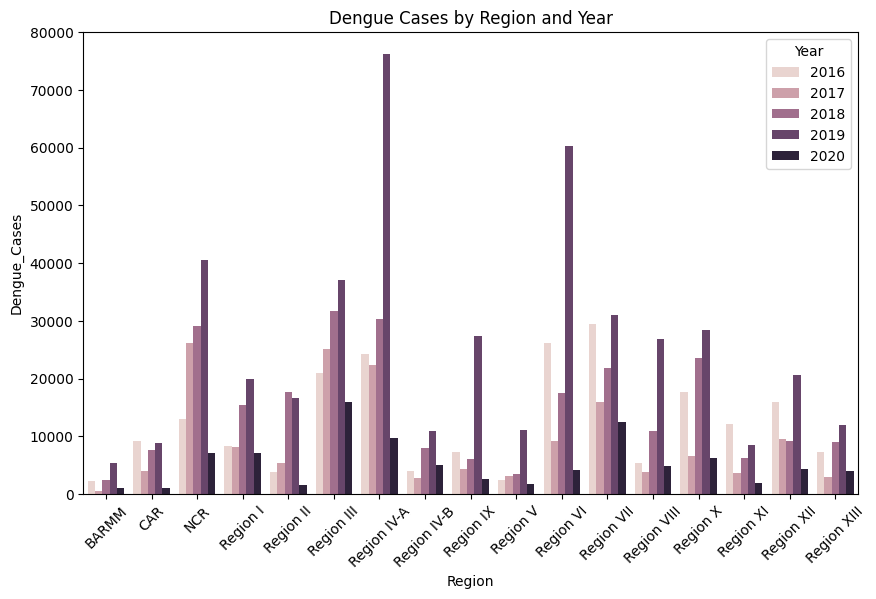

In [16]:
region_year = df.groupby(['Region', 'Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=region_year, x='Region', y='Dengue_Cases', hue='Year')
plt.title('Dengue Cases by Region and Year')
plt.xticks(rotation=45)
plt.show()


# insights shows that  Some regions show consistent case increases across multiple years

# 10 Which year had the largest increase in dengue cases compared to the previous year?

In [25]:
yearly = df.groupby('Year')['Dengue_Cases'].sum().reset_index()
yearly['Change'] = yearly['Dengue_Cases'].diff()
yearly.sort_values(by='Change', ascending=False)


,Year,Dengue_Cases,Change
3,2019,441902,191119.0
2,2018,250783,96628.0
1,2017,154155,-55389.0
4,2020,91041,-350861.0
0,2016,209544,NaN


# insights shows its 2019

# 11.  What is the average dengue mortality rate per region?

In [18]:
df['Mortality_Rate'] = df['Dengue_Deaths'] / df['Dengue_Cases']
df.groupby('Region')['Mortality_Rate'].mean().sort_values(ascending=False)


Region
NCR            0.094127
Region XIII    0.093691
Region XII     0.078923
CAR            0.069733
BARMM          0.065735
Region IX      0.050159
Region VIII    0.044665
Region VI      0.044048
Region X       0.039337
Region XI      0.038167
Region VII     0.033174
Region V       0.009745
Region IV-A    0.004630
Region IV-B    0.004592
Region II      0.004312
Region I       0.003880
Region III     0.003285
Name: Mortality_Rate, dtype: float64

# insights shows that  some regions have a higher mortality rate despite having fewer cases surprisiingly

# 12. Which region has the most consistent dengue cases ?

In [19]:
df.groupby('Region')['Dengue_Cases'].std().sort_values()


Region
BARMM           190.276613
Region XI       448.433355
Region IV-B     474.029028
Region V        481.353791
Region XIII     508.460991
CAR             554.077376
Region XII      762.115261
Region II       866.767789
Region I       1005.175512
Region IX      1125.546539
Region X       1149.844815
Region VIII    1305.976122
Region VII     1451.211897
Region III     1761.876765
NCR            1936.956886
Region VI      3135.241504
Region IV-A    3485.744342
Name: Dengue_Cases, dtype: float64

# insights shows this regions

# 13. Which region shows the highest case-to-death ratio?

In [21]:
ratio = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
ratio['Case_to_Death_Ratio'] = ratio['Dengue_Cases'] / ratio['Dengue_Deaths']
ratio.sort_values(by='Case_to_Death_Ratio', ascending=False)


,Dengue_Cases,Dengue_Deaths,Case_to_Death_Ratio
Region,,,
Region I,59066,157,376.216561
Region III,131064,482,271.917012
Region IV-A,163029,652,250.044479
Region IV-B,30849,130,237.300000
Region II,45141,193,233.891192
Region V,22167,185,119.821622
Region X,82437,848,97.213443
Region IX,47781,532,89.813910
Region VIII,51983,585,88.859829


# insihgts shows its region I

# 14. How are monthly dengue cases and deaths correlated?

In [22]:
monthly_corr = df.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum().corr()
monthly_corr


,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.518281
Dengue_Deaths,0.518281,1.000000


# insights shows that months with more cases have more deaths (obv)

# 16.Which region recorded the highest total dengue cases overall?

In [26]:
region_total = df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
region_total


Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Region X        82437
Region XII      59802
Region I        59066
Region VIII     51983
Region IX       47781
Region II       45141
Region XIII     35293
Region XI       32522
Region IV-B     30849
CAR             30582
Region V        22167
BARMM           11537
Name: Dengue_Cases, dtype: int64

# insights shows its region 4A 